In [0]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pickle
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/SHIFT/готовые csv/posts.csv')

In [5]:
data.shape

(26314, 2)

In [6]:
data.head()

,is_space,text
0,0,Raudondvaris Challenger\r\nDay 2\r\n\r\nЧетвер...
1,0,#ГлавнаяКомандаСтраны: сделать чуть больше тог...
2,0,Главный тренер женской сборной России подвел и...
3,0,Сегодня в Неаполе стартовал баскетбольный турн...
4,0,В первом раунде плей-офф Первенства мира U19 ю...


In [0]:
texts = data['text'].values
target = data['is_space'].values

In [0]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

In [0]:
texts = texts.astype(np.str)

In [0]:
texts = [preprocess(x) for x in texts]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [0]:
count_vec = CountVectorizer()
text_bow = count_vec.fit_transform(texts)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_bow, target, test_size=0.5, random_state=17)

In [14]:
text_bow[:50]

<50x181853 sparse matrix of type '<class 'numpy.int64'>'
	with 3083 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

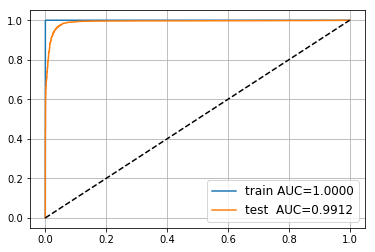

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, bow_model),
    ('test ', X_test, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [17]:
accuracy_score(y_test, bow_model.predict(X_test))

0.9707380101846925

In [0]:
count_vec = CountVectorizer()
text_bow = count_vec.fit_transform(texts)

In [0]:
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_bow)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, target, test_size=0.5, random_state=17)

In [0]:
tfidf_transform_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

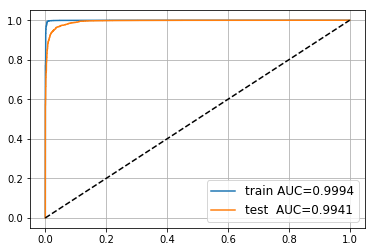

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tfidf_transform_model),
    ('test ', X_test, y_test, tfidf_transform_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [23]:
accuracy_score(y_test, tfidf_transform_model.predict(X_test))

0.9647336018849282

In [0]:
tfidf_vec= TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(texts)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, target, test_size=0.5, random_state=17)

In [0]:
tfidf_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

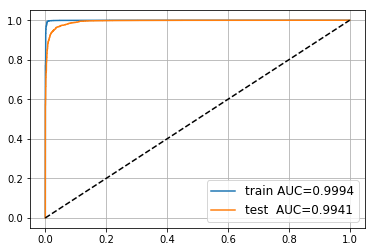

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tfidf_model),
    ('test ', X_test, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [28]:
accuracy_score(y_test, tfidf_model.predict(X_test))

0.9647336018849282

In [0]:
sent = ["Баскетболист Януш забил мяч на последней секунде"]

In [0]:
sent = [preprocess(x) for x in sent]

In [0]:
sent_tfidf = tfidf_vec.transform(sent)

In [32]:
tfidf_model.predict(sent_tfidf)

array([1])

In [33]:
tfidf_model.predict_proba(sent_tfidf)

array([[0.42942437, 0.57057563]])

In [0]:
import pickle

In [0]:
with open('model.pkl', 'wb') as f:
  pickle.dump(tfidf_model, f)

In [0]:
files.download('model.pkl')

In [0]:
with open('/content/drive/My Drive/SHIFT/model.pkl', 'rb') as f:
  model = pickle.load(f)

In [6]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
with open('tfidf_vec.pkl', 'wb') as f:
  pickle.dump(tfidf_vec, f)

In [0]:
files.download('tfidf_vec.pkl')